In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan.csv to loan.csv


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('loan.csv')
print("Data Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Description:")
print(df.describe())

Data Overview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [4]:
# Step 3: Data Preprocessing

# Fill missing values
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [5]:
# Step 4: Training the Model

# Define features and target
X = df[["ApplicantIncome"]]
y = df["LoanAmount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Step 5: Making Predictions
y_pred = model.predict(X_test)

In [7]:
# Step 6: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R²):", r2)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 40.764476200624244
Mean Squared Error (MSE): 3035.5594963663375
Root Mean Squared Error (RMSE): 55.09591179358354
R-Squared (R²): 0.4423741529817312


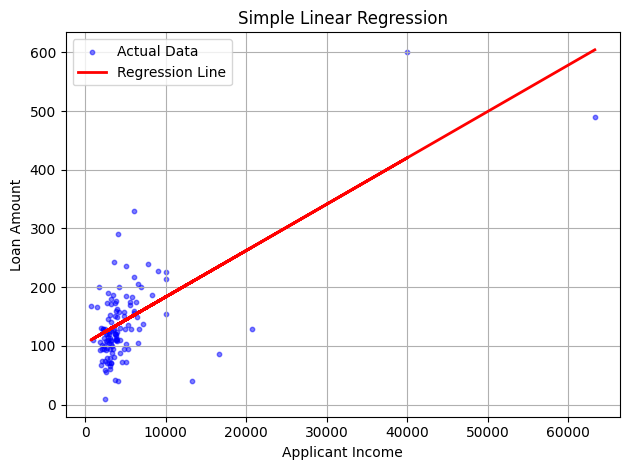

In [8]:
# Step 7: Visualizing Results
plt.scatter(X_test, y_test, color='blue', s=10, alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()